# Lab 5 : Deep Learning : Réseau de neurones profonds

# Réseau de neurones à L couches

Pour développer un réseau de neurones profonds, avec autant de couches que l'on désire à l'intérieur, 

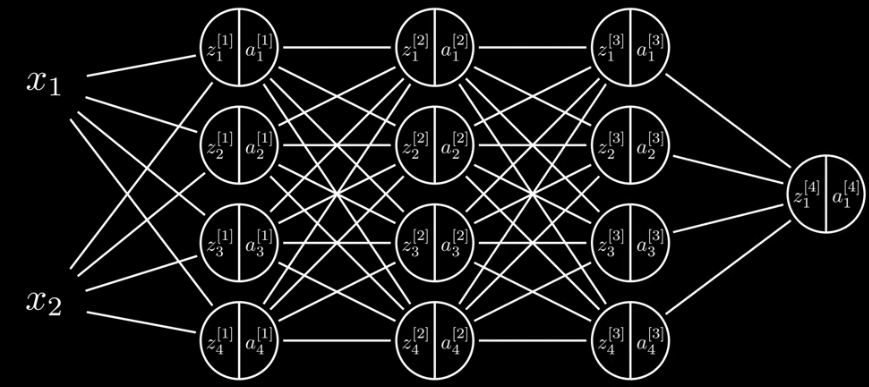

nous allons repartir des équations qui nous avait permis de créer un réseau de neurones à deux couches. 

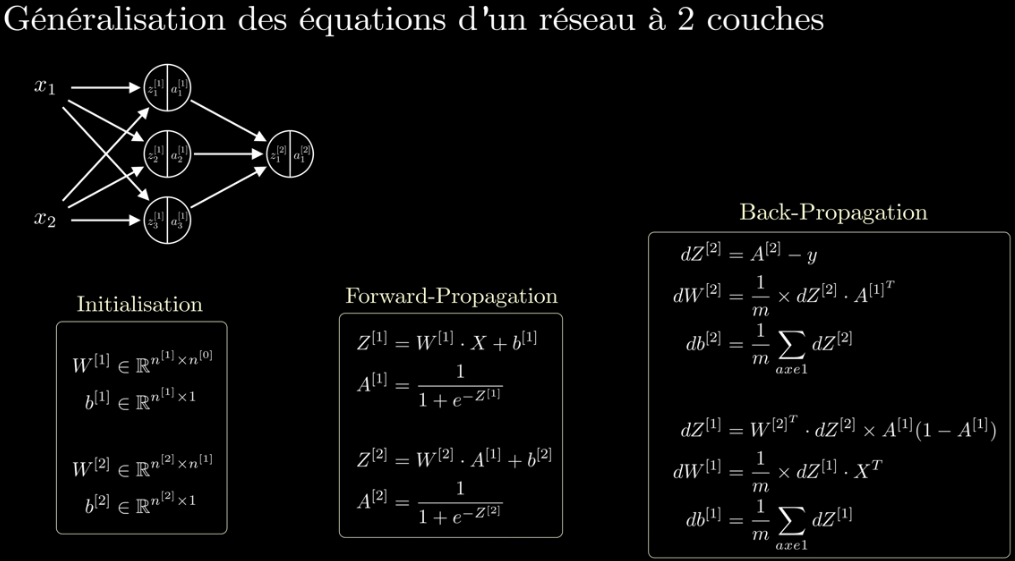

On va essayer de comprendre comment on est passé de la première couche à la deuxième couche et à partir de là nous allons en tirer une règle générale qui nous permettent de passer de n'importe quelle couche $C$ à la couche suivante, c'est à dire $C + 1$ 

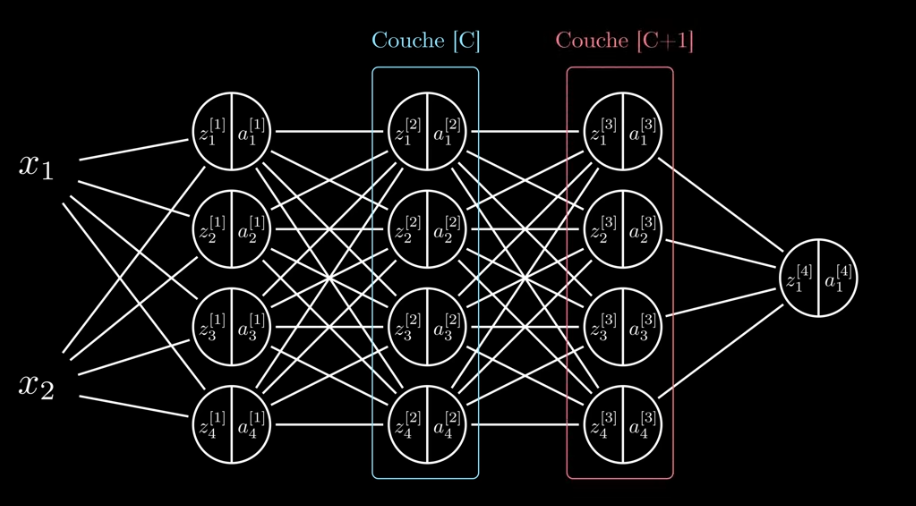

Donc, commençons par les paramètres du modèle. lorsqu'on avait un réseau de neurones à deux couches nous avions quatre paramètres $W^{[1]}$,$b^{[1]}$ et $W^{[2]}$, $b^{[2]}$. Alors si on se penche de plus près sur $W^{[1]}$, on voit qu'ils étaient de dimensions $(n^{[1]} \times n^{[0]})$. Quant à $W^{[2]}$, il était de dimensions $(n^{[2]} \times n^{[1]})$ 

A présent imaginez que l'on rajoute à tout ça une troisième couche et bien vous devinez l'idée $W^{[3]}$ sera de dimension $(n^{[3]} \times n^{[2]})$ et dans le cas où on aurait même une quatrième couche et bien $W^{[4]}$ serait de dimension $(n^{[4]} \times n^{[3]})$. Donc de par cette logique, on peut en déduire que n'importe quelle couche numéro $W^{[C]}$ est en fait de dimension $(n^{[C]} \times n^{[C-1]})$.

A présent, faisons la même chose pour le paramètre $b$, on voit que $b^{[1]}$ est de dimension $(n^{[1]} \times 1)$, $b^{[2]}$ est de dimensions $(n^{[2]} \times 1)$, donc on comprend l'idée $b^{[3]}$ sera de dimension $(n^{[3]} \times 1)$ et $b^{[4]}$ sera de dimensions $(n^{[4]} \times 1)$.

Donc cela, nous permet de compléter notre généralisation en disant que pour n'importe quelle couche numéro $C$, $b^{[C]}$ est en fait de dimension $(n^{[C]} \times 1)$. 

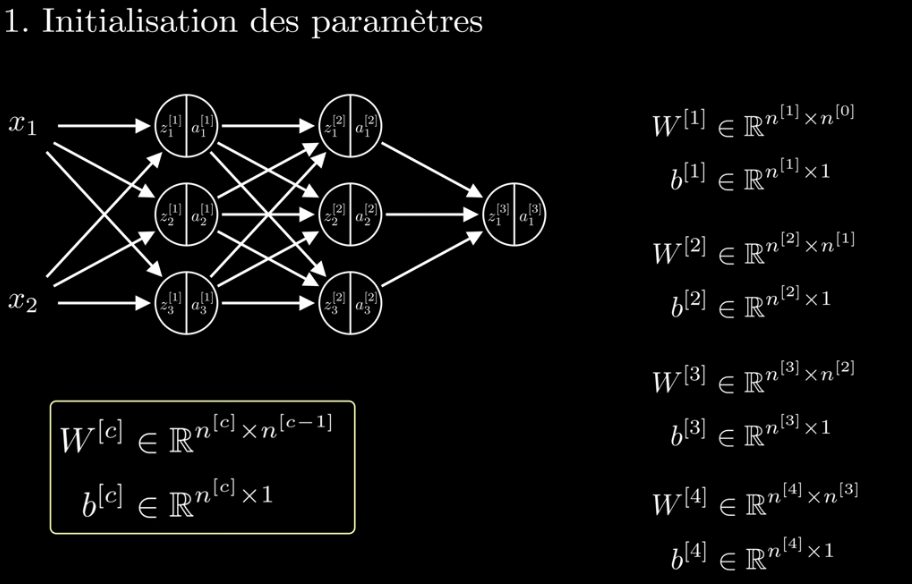

Et voilà avec ces deux formules vous êtes désormais capable d'initialiser les paramètres d'un réseau de neurones avec autant de couches que vous voulez à l'intérieur

Pour ça, il suffit de placer les dimensions $(n^{[0]}$, $n^{[1]}$, $n^{[2]}$, $n^{[3]}$, $...)$  au sein d'une liste, puis d'utiliser une boucle for afin de prendre chaque élément de cette liste pour initialiser les paramètres de chaque couche.

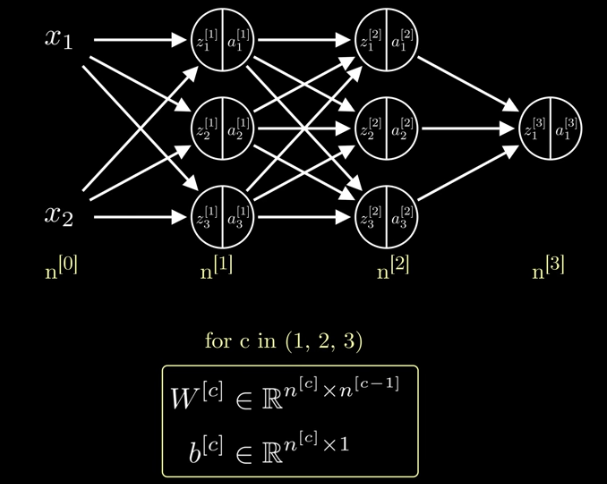

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

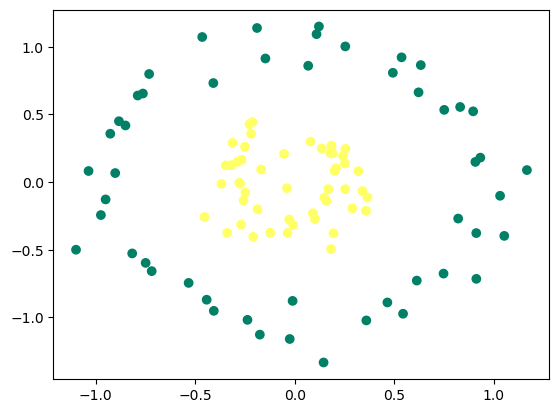

dimensions de X: (2, 100)
dimensions de y: (1, 100)


In [2]:
from sklearn.datasets import make_circles

X_train, y_train = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

X_train_reshape = X_train.T
y_train_reshape = y_train.reshape((1, y_train.shape[0]))

plt.scatter(X_train_reshape[0, :], X_train_reshape[1, :], c=y_train_reshape, cmap='summer')
plt.show()

X = X_train_reshape
y = y_train_reshape

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

### 1. Initialisation

Dans cette fonction, nous allons faire passer cette liste de dimensions qui comprend donc  $(n^{[0]}$, $n^{[1]}$, $n^{[2]}$, $n^{[3]}$, $...)$ 

Alors dans cette fonction on va donc écrire une boucle for allant de la première couche jusqu'à la toute dernière, la couche $C$ qui va donc être égal à la longueur de la liste de dimensions.  Et c'est dans cette boucle for qu'on va donc pouvoir créer $W^{[1]}$,  $b^{[1]}$, $W^{[2]}$, $b^{[2]}$ et d'une manière générale n'importe quelle valeur $W^{[C]}$ et $b^{[C]}$. 

Alors, pour ça on va partir d'un dictionnaire de paramètres initialement vide qu'on va placer à la tête de notre fonction. Et c'est dans la boucle for qu'on va rajouter à chaque itération une clé $W^{[C]}$ ou $C$ représente la couche en cours. Ainsi qu'une clé $b^{[C]}$. Et c'est comme ça qu'on aura les valeurs $W^{[1]}$,$b^{[1]}$, $W^{[2]}$, $b^{[2]}$, ... 

Donc, il ne reste plus qu'à dire à quoi sont égales ces différentes valeurs, donc on va avoir pour $W$, une matrice **random.randn** de dimensions $(C, C-1)$ et pour $b$, on va avoir un vecteur de dimension $(C, 1)$. 

In [3]:
def initialisation(dimensions):
    parameters = {}
    C = len(dimensions)

    for c in range (1 , C):
        parameters['W' + str(c)] = np.random.randn(dimensions[c], dimensions[c-1])
        parameters['b' + str(c)] = np.random.randn(dimensions[c], 1)

    return parameters

On va tester en y faisant passer la liste suivante. 

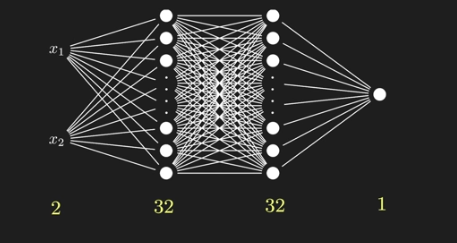

Donc on a ici un réseau de neurones avec trois couches, puisque bien sûr l'entrée c'est pas vraiment considéré comme une couche qui est $n^{[0]}$ et on a bien $n^{[1]}$, $n^{[2]}$ et $n^{[3]}$ 

In [4]:
##### TEST
parameters = initialisation([X.shape[0], 32, 32, y.shape[0]])

for key,val in parameters.items():
    print(key, val.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


### 2. Forward Propagation

A présent, faisons le même exercice de généralisation pour les équations de la **forward_propagation()**. 

Lorsqu'on avait un réseau de neurones à deux couches, on avait 

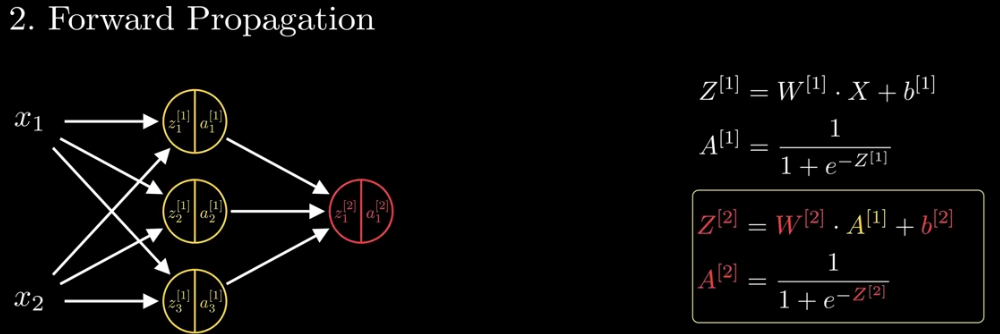

En fait, pour calculer les éléments de cette deuxième couche, on venait chercher les activations de la première couche. 

Donc vous imaginez l'idée, si nous rajoutons une troisième couche à ce réseau, pour calculer les éléments de cette troisième couche, nous allons devoir nous servir des activations de la deuxième couche et on aura donc 

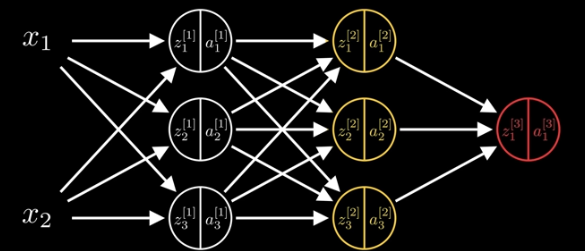

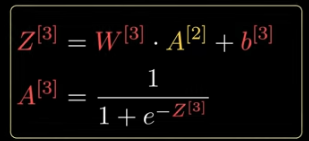

Donc on peut généraliser tout cela en écrivant que pour n'importe quelle couche $C$, cela nous permet de calculer $Z^{[2]}$, $Z^{[3]}$, $Z^{[4]}$, ...  	

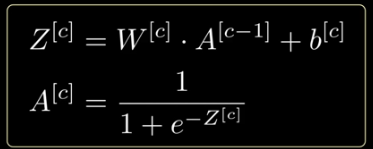

mais pour $Z^{[1]}$, ça ne fonctionne pas tout à fait puisque d'après nos formules $Z^{[1]}=W^{[1]} \cdot X+b^{[1]}$ et non pas $Z^{[1]}=W^{[1]} \cdot A^{[0]} + b^{[1]}$. 

Cependant, il existe une petite astuce pour que notre formule fonctionne quand même pour $Z^{[1]}$, c'est de dire que $X=A^{[0]}$ et voilà avec ça nous avons de quoi calculer $Z^{[C]}$ pour n'importe quelle couche $C$. Et pour les activations $A^{[C]}$, c'est très simple on passe tout simplement $Z^{[C]}$ dans la fonction sigmoïde. 

Donc pour programmer tout, ça nous allons modifier la fonction de **forward_propagation()** qui nous avait servi pour un réseau de neurones à deux couches. 

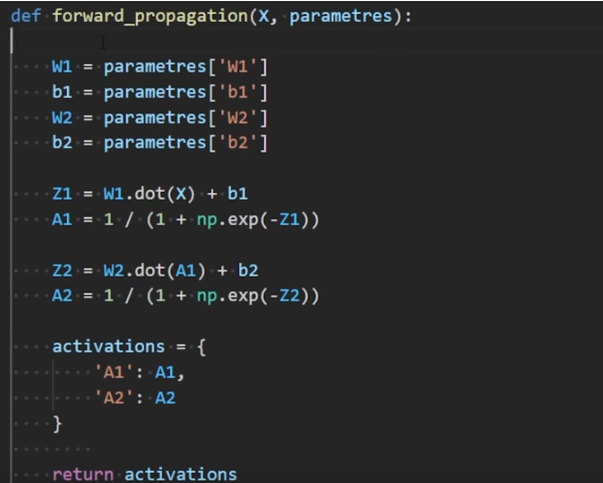

A l'époque, nous avions commencé par extraire les paramètres $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$, puis nous les avions utilisés pour calculer $Z^{[1]}$, $A^{[1]}$ et $Z^{[2]}$, $A^{[2]}$ et pour finir nous avions placé les activations dans un dictionnaire que nous avions retourné. 

Donc ce qu'on va faire à présent, c'est de placer tout ça dans une boucle for. Pour commencer, nous allons initialiser un dictionnaire d'activation en créant déjà une clé $A^{[0]}$ qui est associé à la matrice $X$. Ensuite, nous allons pouvoir initier notre boucle for en voulant partir de la première couche et en allant jusqu'à la toute dernière, ceci dans le but de calculer  $Z^{[1]}$, $A^{[1]}$ et $Z^{[2]}$, $A^{[2]}$, $Z^{[3]}$, $A^{[3]}$. 

Donc pour ça, nous allons écrire **for c in range (1, C + 1)**, si on écrit **C + 1**, c'est parce que dans python, quand on définit la fonction **range**, celle ci va s'arrêter juste un nombre avant le **C + 1**.

Alors, avant d'entrer dans cette boucle for, il va falloir définir $C$ et pour ça on va se servir du dictionnaire paramètres parce que dans ce dictionnaire paramètres on retrouve la longueur de notre réseau. En effet, si on a un réseau de deux couches alors on a quatre paramètres à l'intérieur $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$ si nous avons un réseau de neurones à trois couches alors on a six paramètres $W^{[1]}$, $b^{[1]}$, $W^{[2]}$, $b^{[2]}$,$W^{[3]}$, $b^{[3]}$ donc d'une manière générale on peut dire que la longueur du réseau français est égale à la longueur du dictionnaire paramètres divisé par deux. Et ici on fait une division entière afin de tomber sur un nombre entier. 

In [5]:
def forward_propagation(X, parameters):
    activations = {'A0': X}
    C = len(parameters) // 2
    
    for c in range (1, C+1):
        Z = parameters['W' + str(c)].dot(activations['A' + str(c-1)]) + parameters['b' + str(c)]
        activations['A' + str(c)] = 1 / (1 + np.exp(-Z))

    return activations

Avec ça on retourne un dictionnaire d'activation qui va comprendre toutes les activations de notre réseau de neurones. 

On va tester notre fonction en y faisant passer le dictionnaire de paramètres qu'on a généré tout à l'heure, ainsi qu'une matrice $X$ comprenant deux variables et 100 échantillons. 

In [6]:
##### TEST
activations = forward_propagation (X, parameters)

for key,val in activations.items():
    print(key, val.shape)  

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


### 3. Back-Propagation

Lorsque nous avions un réseau de neurones à deux couches, 

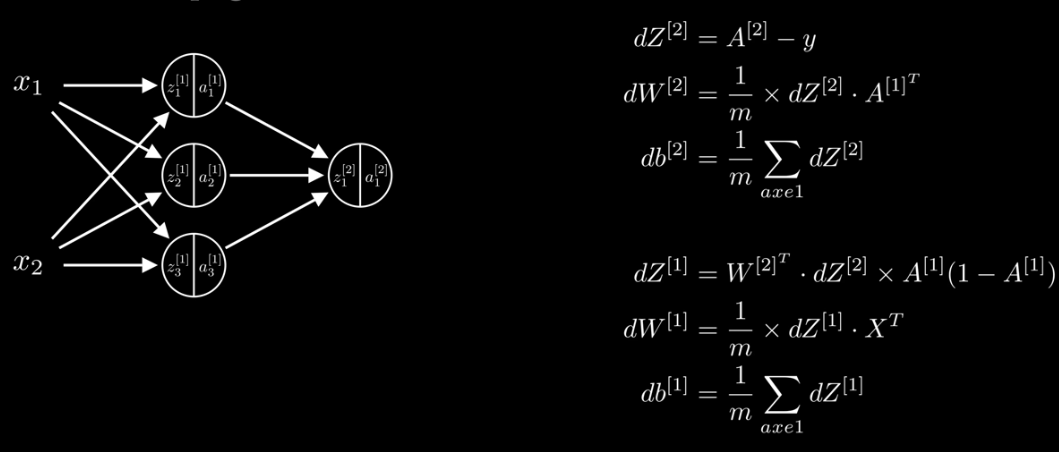

nous avions les équations suivante pour commencer on calculait $dZ^{[2]}$ à la sortie du réseau de neurones puis $dW^{[2]}$ et $db^{[2]}$. Eensuite, pour passer de la deuxième couche à la première gauche, on a calculé $dZ^{[1]}$ suivi de $dW^{[1]}$ et $db^{[1]}$. 

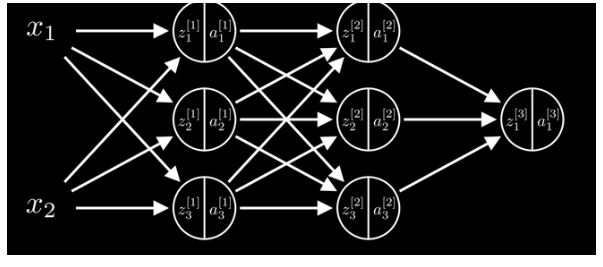

A présent, si on imagine faire la même chose pour un réseau de neurones à trois couches en sortie de notre réseau, on n'aura pas $dZ^{[2]}$ mais $dZ^{[3]}$ et celui ci sera égal à la sortie du réseau c'est-à-dire $AZ^{[3]} - y$ ensuite pour savoir à quoi sera égale $dW^{[3]}$ et $db^{[3]}$, on va tout simplement voir à quoi était égal $dW^{[2]}$ et $db^{[2]}$ dans notre réseau de neurones à deux couches. Et on va incrémenté de 1 toutes nos unités.

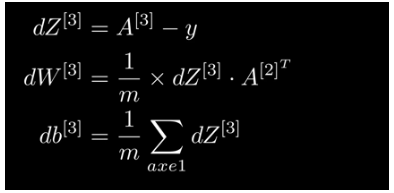

Ensuite une fois qu'on a calculé tous les gradients de la troisième couche, on va pouvoir passer à la deuxième couche et pour ça il va falloir commencer par calcul et $dZ^{[2]}$, alors comme tout à l'heure on peut faire le parallèle avec $dZ^{[1]}$ 

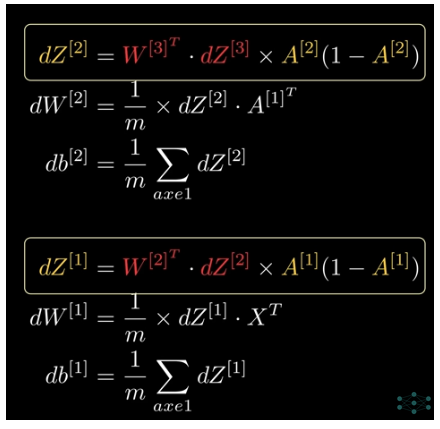

Donc pour généraliser, lorsqu'on veut effectuer une Back-Propagation, nous avons besoin des quatre équations suivante pour commencer l'équation du gradient de la couche finale 

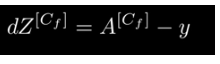

Ensuite pour toutes les couches de la dernière jusqu'à la toute première nous avons

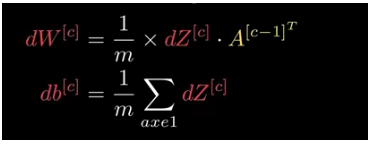

comme vous le voyez cela fonctionne pour toutes les couches, y compris la toute première car tout à l'heure nous avons posé que $X=A^{[0]}$. 

Pour finir notre Back-Propagation, il nous reste à connaître la formule nous permettant de passer d'une couche numéro $C$ à la couche $C-1$ et cette formule $dZ^{[1]}$ c'est 

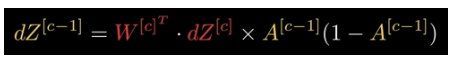

Encore une fois, vous voyez qu'elle fonctionne très bien ici pour $dZ^{[2]}$ et $dZ^{[1]}$. 

Donc pour résumé, lorsque l'on veut effectuer une Back-Propagation il faut écrire une boucle for allant de la dernière couche jusqu'à la toute première au sein de laquelle on calcule $dW^{[C]}$,  $db^{[C]}$ et $dZ^{[C - 1]}$  qui nous permet de passer de la couche $C$ à la couche $C-1$. 

Pour implémenter tout ça nous allons, utilisez une boucle for allant de la première couche jusqu'à la toute dernière. 

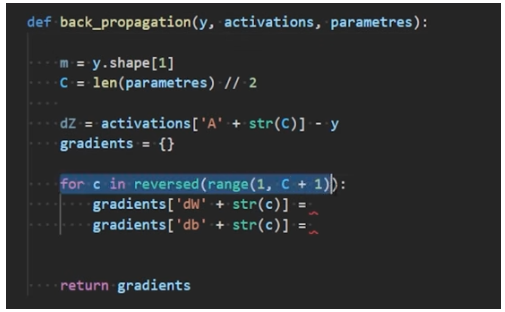

Mais cette boucle for, nous allons la renverser puisque ce qu'on veut faire c'est partir de la toute dernière couche $C$ est remonté jusqu'à la toute première couche.

Donc pour ça comme tout à l'heure, on définit la longueur du réseau de neurones. 

On pose déjà le tout premier $dZ$, puis on définit un dictionnaire de gradient initialement vide au sein duquel on va rajouter à chaque itération le gradient $dW^{[C]}$, $db^{[C]}$  

voilà avec cette dernière ligne qui est très importante on peut passer d'une couche numéro $C$, à la couche précédente $C - 1$. Alors, si on veut être très rigoureux en réalité cette dernière ligne il faut l'utiliser uniquement lorsque $C$ est supérieur à 1 parce qu'en effet lorsque $C$ va être égal à 1, ça n'a pas de sens de calculer $dZ^{[0]}$ puisque ça n'existe tout simplement  Ca ne va pas retourner une erreur si vous le faites parce qu'en plus vous n'allez pas vous en servir dans la suite de vos calculs.

In [18]:
def back_propagation(y, activations, parameters):
    
    m = y.shape[1]
    C = len(parameters) // 2
    
    gradients = {}
    
    dZ = activations['A' + str(C)] - y #AC - y
    
    for c in reversed(range(1, C+1)):
        gradients['dW' + str(c)] = 1/m * np.dot(dZ, activations['A' + str(c - 1)].T)
        gradients['db' + str(c)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        if (c > 1):
            dZ = np.dot(parameters['W' + str(c)].T,dZ) * activations['A' + str(c - 1)] * (1 - activations['A' + str(c - 1)])
            
    return gradients

Il ne reste plus qu'à la tester avec les activations et les paramètres qu'on a généré tout à l'heure. 

In [20]:
##### TEST
gradients = back_propagation (y, activations, parameters)

for key,val in gradients.items():
    print(key, val.shape)  

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


### 4. Mise à jour des paramètres

Pour finir dans tout ça, il ne reste plus qu à généraliser les fonctions de la descente de gradient. On va définir une boucle for allant de la première couche jusqu'à la toute dernière. Et à chaque itération de cette boucle on va pouvoir mettre à jour les paramètres $W^{[C]}$ et $b^{[C]}$ de la manière suivante

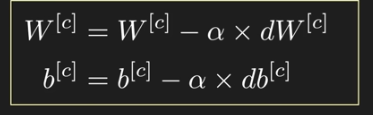

In [21]:
def update(gradients, parametres, learning_rate):
    C=len(parametres) //2
    
    for c in range (1,C + 1) :
        parametres ['W' + str(c)]= parametres ['W' + str(c)] - learning_rate * gradients['dW' + str(c)]
        parametres ['b' + str(c)]= parametres ['b' + str(c)] - learning_rate * gradients['db' + str(c)]

    return parametres

### 5. Final code

In [37]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    C = len(parametres) // 2
    Af = activations['A' + str(C)]
    
    return Af >= 0.5

In [42]:
def visualisation(X, y, params):
    fig, ax = plt.subplots()
    ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
    
    x0_lim = ax.get_xlim()
    x1_lim = ax.get_ylim()
    
    resolution = 100
    x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
    x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)
    
    #meshgrid
    X0, X1 = np.meshgrid(x0, x1)

    #assemblee (100, 100) => (1000, 2)
    XX = np.vstack((X0.ravel(), X1.ravel()))

    Z = predict(XX, params)
    Z = Z.reshape((resolution, resolution))

    ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)
    ax.contour(X0, X1, Z, colors='green')
    
    plt.show()

In [60]:
def neural_network (X, y, hidden_layers=(32, 32, 32), learning_rate=0.1 , n_iter=1000):
    
    np. random. seed(0)
    
    #initialisation , b    
    dimensions = list(hidden_layers)
    dimensions.insert(0, X.shape[0])
    dimensions.append(y.shape[0])

    parametres =  initialisation(dimensions)

    train_loss = []
    train_acc = []
    
    history=[]

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X , parametres)
        gradients = back_propagation(y, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
                
        if i%10 == 0:
            C=len(parametres) // 2
            train_loss.append(log_loss(y, activations ['A' + str(C)]))
            y_pred = predict(X, parametres)
            current_accuracy = accuracy_score(y.flatten() , y_pred.flatten())
            train_acc.append(current_accuracy)
            history.append([train_loss, train_acc])

    #Visualisation des résultats
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
    ax[0].plot(train_loss, label='train loss')
    ax[0].legend ()

    ax[1].plot(train_acc, label='train acc')
    ax[1].legend()
    
    visualisation(X, y, parametres)

    plt.show()
    
    return parametres

100%|██████████| 10000/10000 [00:03<00:00, 2763.96it/s]


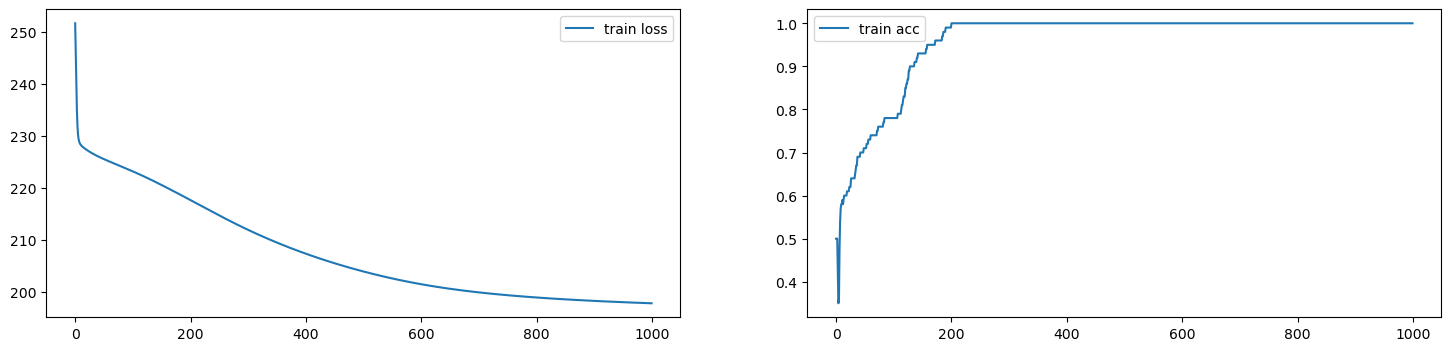

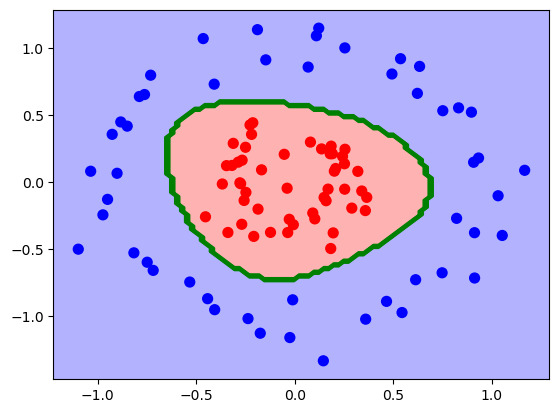

In [61]:
y_pred = neural_network(X, y, learning_rate=0.01, n_iter=10000)

In [329]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [330]:
def derivative_sigmoid(x):
    return x * (1 - x)

In [331]:
def initialisation(layer_dims):
    #layers dims par ex = (X.shape[0], 32, 64, 64, 32 y.shape[0])
    
    params = {}
    
    L = len(layer_dims)
    
    for l in range (1 , L):
        params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])
        params['b' + str(l)] = np.random.randn(layer_dims[l], 1)

    return params

In [332]:
##### TEST
params = initialisation((X.shape[0], 32, 64, 64, y.shape[0]))

for k,v in params.items():
    print(k, v.shape)
    

W1 (32, 2)
b1 (32, 1)
W2 (64, 32)
b2 (64, 1)
W3 (64, 64)
b3 (64, 1)
W4 (1, 64)
b4 (1, 1)


In [333]:
def forward_propagation(X, params):
    cache = {'A0': X}
    L = len(params) // 2
    
    for l in range (1, L+1):
        Z = params['W' + str(l)].dot(cache['A' + str(l-1)])
        cache['A' + str(l)] = sigmoid(Z)
    
    return cache

In [334]:
##### TEST
cache = forward_propagation (X, params)

for k,v in cache.items():
    print(k, v.shape)    

A0 (2, 100)
A1 (32, 100)
A2 (64, 100)
A3 (64, 100)
A4 (1, 100)


In [335]:
def compute_gradients(cache, y, params):

    m = y.shape[1]
    L = len(params) // 2
    
    
    dZ = cache['A' + str(L)] - y
    gradients = {}
    
    for l in reversed(range (1, L + 1)):
        gradients['dW' + str(l)] = 1/m * np.dot(dZ, cache['A' + str(l - 1)].T)
        gradients['db' + str(l)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        dZ = np.dot(params['W' + str(l)].T, dZ) * derivative_sigmoid(cache['A' + str(l-1)])
    
    return gradients

In [336]:
##### TEST
gradients = compute_gradients (cache, y, params)

for k,v in gradients.items():
    print(k, v.shape)

dW4 (1, 64)
db4 (1, 1)
dW3 (64, 64)
db3 (64, 1)
dW2 (64, 32)
db2 (64, 1)
dW1 (32, 2)
db1 (32, 1)


In [337]:
def back_propagation(X, y,  params, cache, learning_rate):
    
    gradients = compute_gradients(cache, y, params)
    
    L = len(params) // 2
    for l in range (1, L+1):
        params['W' + str(l)] = params['W' + str(l)] - learning_rate * gradients['dW' + str(l)]
        params['b' + str(l)] = params['b' + str(l)] - learning_rate * gradients['db' + str(l)]
    
    return params        

In [338]:
def predict(X, params):
    cache = forward_propagation(X, params)
    L = len(params) // 2
    AL = cache['A' + str(L)]
    
    return AL >= 0.5

In [339]:
def visualisation(X, y, params):
    fig, ax = plt.subplots()
    ax.scatter(X[0, :], X[1, :], c=y, cmap='bwr', s=50)
    
    x0_lim = ax.get_xlim()
    x1_lim = ax.get_ylim()
    
    resolution = 100
    x0 = np.linspace(x0_lim[0], x0_lim[1], resolution)
    x1 = np.linspace(x1_lim[0], x1_lim[1], resolution)
    
    #meshgrid
    X0, X1 = np.meshgrid(x0, x1)

    #assemblee (100, 100) => (1000, 2)
    XX = np.vstack((X0.ravel(), X1.ravel()))

    Z = predict(XX, params)
    Z = Z.reshape((resolution, resolution))

    ax.pcolormesh(X0, X1, Z, cmap='bwr', alpha=0.3, zorder=-1)
    ax.contour(X0, X1, Z, colors='green')
    
    plt.show()

In [340]:
def neural_network(X, y, layer_dims, learning_rate=0.01, n_iter=1000):

    # initialisation parametres
    params = initialisation(layer_dims)
    
    # gradient descent
    for i in tqdm(range(n_iter)):
        cache = forward_propagation(X, params)
        params = back_propagation(X, y, params, cache, learning_rate)
    
    y_pred = predict(X, params)
    visualisation(X, y, params)
    

    return y_pred

100%|██████████| 10000/10000 [00:00<00:00, 10277.50it/s]


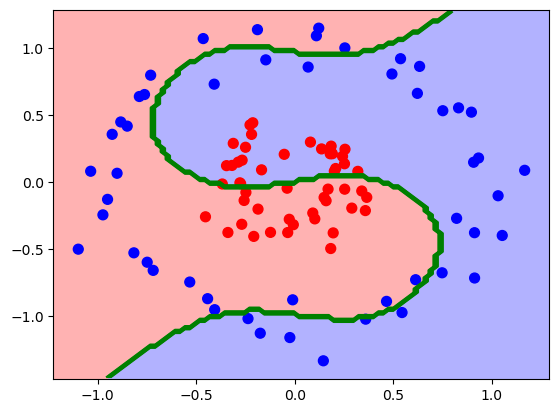

In [345]:
y_pred = neural_network(X, y, layer_dims=(X.shape[0], 2, y.shape[0]), n_iter=10000)